# Python Imports

In [2]:
import io
import os
import sys
import numpy as np
from PIL import Image
import pandas as pd
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px

# Control Constants

In [3]:

WIDTH = 500
HEIGHT = 500
MARGIN = 50
RADIUS = 5

WHITE ='#FFFFFF'
RED = '#FF0000'
DARK_RED = '#660000'
GREEN = '#00FF00'
BLUE = '#0000FF'
BLACK =  '#000000'
BACKGROUND = 'rgba(50,205,50)'


In [4]:
LAYOUT = go.Layout(
    
    autosize=False,
    width=WIDTH+MARGIN,
    height=HEIGHT+MARGIN,
    plot_bgcolor=GREEN,
    paper_bgcolor=WHITE,
    margin=dict(l=MARGIN//2, r=MARGIN//2, t=MARGIN//2, b=MARGIN//2)
)
MARKER_SETTINGS = dict(size=RADIUS, color=RED, line=dict(width=2, color=RED))
print(LAYOUT)
print("Marker Settings: {}".format(MARKER_SETTINGS))

Layout({
    'autosize': False,
    'height': 550,
    'margin': {'b': 25, 'l': 25, 'r': 25, 't': 25},
    'paper_bgcolor': '#FFFFFF',
    'plot_bgcolor': '#00FF00',
    'width': 550
})
Marker Settings: {'size': 5, 'color': '#FF0000', 'line': {'width': 2, 'color': '#FF0000'}}


In [5]:
def plotly_fig2array(fig):
    fig_bytes = fig.to_image(format='png')
    buffer = io.BytesIO(fig_bytes)
    img = Image.open(buffer)
    return np.asarray(img)

def traceof(x, y):
    return go.Scatter(x=x, y=y, mode='markers', marker=MARKER_SETTINGS)

def lineof(x, y):
    return go.Scatter(x=x, y=y, mode='lines')

def figure(x, y):
    fig = go.Figure(layout=LAYOUT)
    fig.add_trace(traceof(x, y))
    return fig

def ImageOf(x, y):
    return Image.fromarray(plotly_fig2array(figure(x, y)))

def ImageDataOf(x, y):
    return plotly_fig2array(figure(x, y))


# Question One

Does the degree of correlation effect the number of samples needed to effectively display a linear trend in the data?


### Uniform Sampling Case

$$
p(x) = \frac{1}{b-a}
$$

### Normal Distribution

$$
p(x) = N(u, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\frac{(x - u)^2}{\sigma^2}}
$$

In [6]:
N = 10000
a, b = 0, 1
midpoint = (b - a) / 2

x_uniform, x_normal = np.random.uniform(a, b, N), np.random.normal(size=N)
y_uniform, y_normal = np.random.uniform(a, b, N), np.random.normal(size=N)


In [7]:
trace_xu_yu = go.Scatter(x=x_uniform, y=y_uniform, mode='markers', marker=MARKER_SETTINGS)
trace_xu_yn = go.Scatter(x=x_uniform, y=y_normal,  mode='markers', marker=MARKER_SETTINGS)
trace_xn_yu = go.Scatter(x=x_normal,  y=x_uniform,  mode='markers', marker=MARKER_SETTINGS)
trace_xn_yn = go.Scatter(x=x_normal,  y=y_normal,   mode='markers', marker=MARKER_SETTINGS)

R =  -0.001945756857537772
Output Shape: (550, 550, 4)


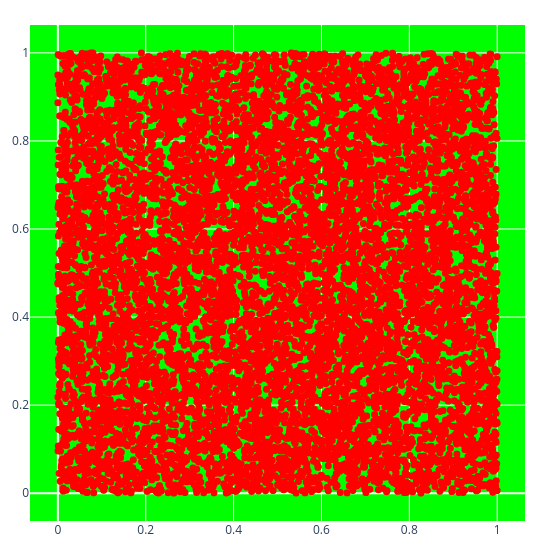

In [8]:
fig1 = go.Figure(layout=LAYOUT)
fig1.add_trace(trace_xu_yu)
xu_yu_img = plotly_fig2array(fig1)
print("R = ", np.corrcoef(x=x_uniform, y=y_uniform)[0, 1])
print("Output Shape: {}".format(xu_yu_img.shape))
Image.fromarray(xu_yu_img)

R =  -0.0018046663457001147
Output Shape: (550, 550, 4)


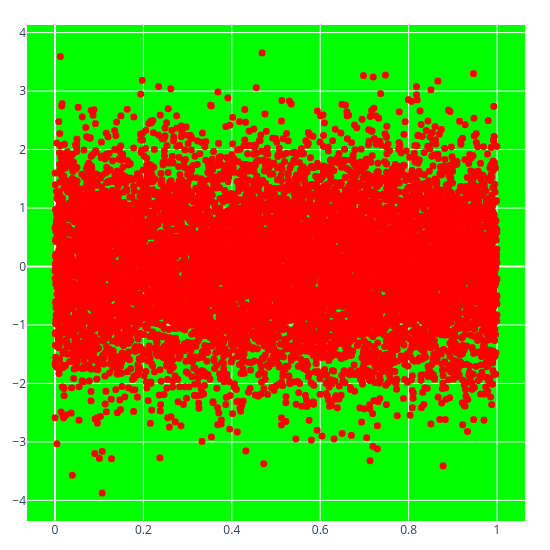

In [9]:
fig2 = go.Figure(layout=LAYOUT)
fig2.add_trace(trace_xu_yn)
xu_yn_img = plotly_fig2array(fig2)
print("R = ", np.corrcoef(x=x_uniform, y=y_normal)[0, 1])
print("Output Shape: {}".format(xu_yn_img.shape))
Image.fromarray(xu_yn_img)

R =  -0.018254522647474347
Output Shape:  (550, 550, 4)


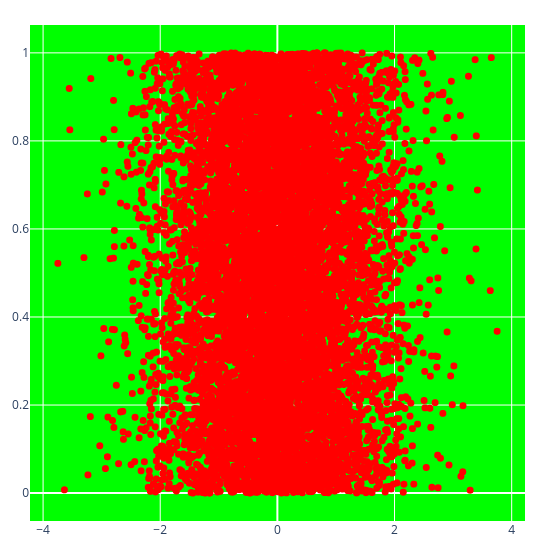

In [10]:
fig3 = go.Figure(layout=LAYOUT)
fig3.add_trace(trace_xn_yu)
xn_yu_img = plotly_fig2array(fig3)
print("R = ", np.corrcoef(x=x_normal, y=y_uniform)[0, 1])
print("Output Shape: ", xn_yu_img.shape)
Image.fromarray(xn_yu_img)

R =  0.0053466282132757096
Output Shape:  (550, 550, 4)


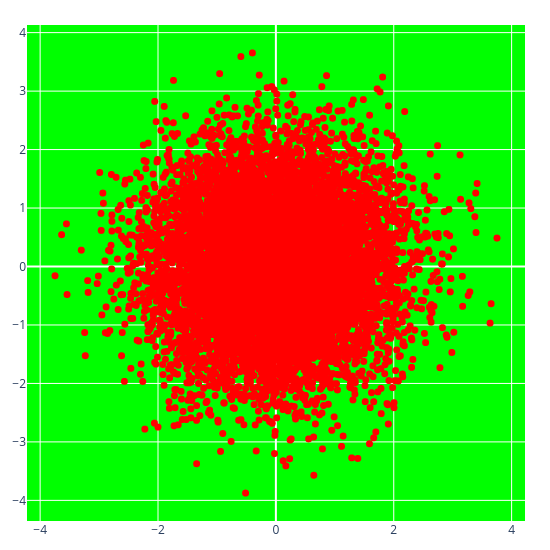

In [11]:
fig4 = go.Figure(layout=LAYOUT)
fig4.add_trace(trace_xn_yn)
xn_yn_img = plotly_fig2array(fig4)
print("R = ", np.corrcoef(x=x_normal, y=y_normal)[0, 1])
print("Output Shape: ", xn_yn_img.shape)
Image.fromarray(xn_yn_img)

In [64]:
fig4

Things to note. The correlatation between two vairables is the their shared percentage of shared determinants. For instance, smoking and lung cancer have a shared determinant of carcinogens which explains their observed correlation. So what the above plots are demonstrating is that independently operating distributions yield low correlation values.


A distribution or relation can take multiple arbitrary shapes. Note that a normal distribution is less sparse than a uniform distribution, it therefore consumes less 'space' then a uniform distribution.
For any dataset, there can be multiple distributions present. For a generic online sampler, we have no prior on what distribution will be observed. This is partly why uniform random sampling is so prevalent.

Let's take the persepctive of a data analyst looking to quick visaulize possible trends in the data. Assume the dataset is well over 1M data points so visualizaing all of them is impractical for interactive, exploratory uses.

1) What is the minimum number of samples needed to confidently capture a trend or conclude there is no trend in the data?

2) What is the number of samples needed in which updates to the plot yield no perceptable difference in final image?

Right now you have a generic Buffon Coin sampler which uses the parameters of the plot to specify an upper bound on the number of samples needed to display on a plot before overplotting occurs.

3) Can you this sampling methodolgy capture enough data to have a correlation or not?

### A Start

Lets start simple. Assume there is a linear trend $y=x$. The variable $x$ is normally distributed with $y$ normally distributed from it.

R =  0.7064377998516986


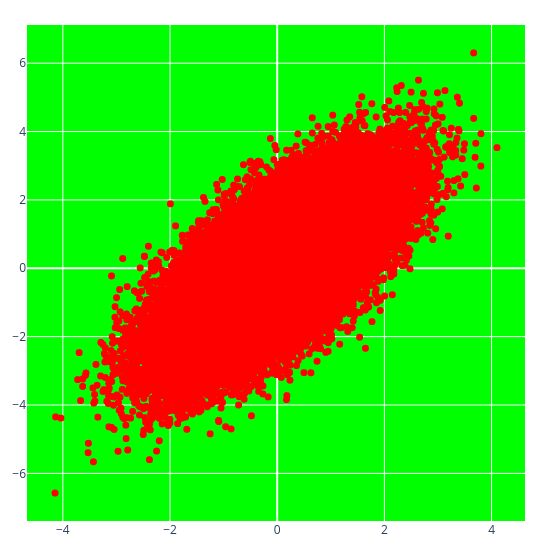

In [58]:
x = np.random.normal(size=50000)
y = x + np.random.normal(size=50000)

R = np.corrcoef(x, y)
print("R = ", R[0][1])


img, img_data = ImageOf(x, y), ImageDataOf(x, y)
img

Ok. We have the expected clustering in the center (Normal Distribution is taking up less space than Uniform). We also have the true correlation $r$. Lets observe how the correlation changes as we randomly sample from the data.

In [59]:
data = np.concatenate((x[None, :].T, y[None, :].T), axis=1)
sample_rates = (np.arange(0.01, 1.01, step=0.01) * len(data)).astype(np.int32)
print(sample_rates)


[  500  1000  1500  2000  2500  3000  3499  4000  4500  5000  5500  6000
  6500  7000  7500  8000  8500  9000  9500 10000 10500 11000 11500 12000
 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000
 18500 19000 19500 20000 20500 21000 21500 22000 22500 23000 23500 24000
 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000
 30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 36000
 36500 37000 37500 38000 38500 39000 39500 40000 40500 41000 41500 42000
 42500 43000 43500 44000 44500 45000 45500 46000 46500 47000 47500 48000
 48500 49000 49500 50000]


A note on this sample rate. It scales with the population size. Might be worth exploring how to update sampling rates to be smaller increments in extreeme cases.

In [60]:
def correlations_over_samples(data, sample_rates):
    correlations = []
    for k in sample_rates:
        indices = np.random.permutation(k)
        correlation = np.corrcoef(x=data[indices, 0], y=data[indices, 1])[0, 1]
        correlations.append(correlation)
    return np.array(correlations)

In [62]:
r_values = correlations_over_samples(data, sample_rates)

In [63]:
line_fig = go.Figure(lineof(x=sample_rates, y=r_values))
line_fig

Ok. So now we know how the correlation is evolving over time for this simulated dataset. How does the difference in image quality change over sample rates?

Image quality is subjective. Human judgement is a HIGHLY imprecise as a measuring device. For now, use simple objective functions such as Euclidean distance to measure the differneces in images over time. It would also be helpful to have a ground truth image score as well at all times.


It would be cool if we could implement some sort of metric closely related to Visualization Aware Sampling (VAS) to meaure image quality since. VAS can imploy the property of locality and has been correlated with user studies. (Though I am always doubtful of the representativeness of the user studies in the HCI community.)


Also note, the beginning of the correlation curve is very noisy (normally distributed around the ideal correlation value). It might be worth representing this with a heat map distribution at the beginning.

Also note, it might be worth considering only the most outlying point on this correlation curve or any such curve.

### Candidate Metric Functions

#### L1 and L2 Norms

In [17]:
def norm(x: np.array, y: np.array, p=2):
    if x.shape != y.shape:
        raise ValueError("Mismatch Input Element Shape. X-Shape: {} != Y-Shape: {}", x.shape, y.shape)
    if p != 1 and p != 2:
        raise ValueError("Only Support L1 and L2 Norms. Input p = {}", p)
    return np.sqrt((np.sum(np.abs(x - y)**p)))

class Normal:
    def __init__(self, p=2):
        self.p = p

    def __call__(self, x: np.array, y: np.array):
        return norm(x=x, y=y, p=self.p)

#### Analysis

Shape Of Image Data:  (550, 550, 4)


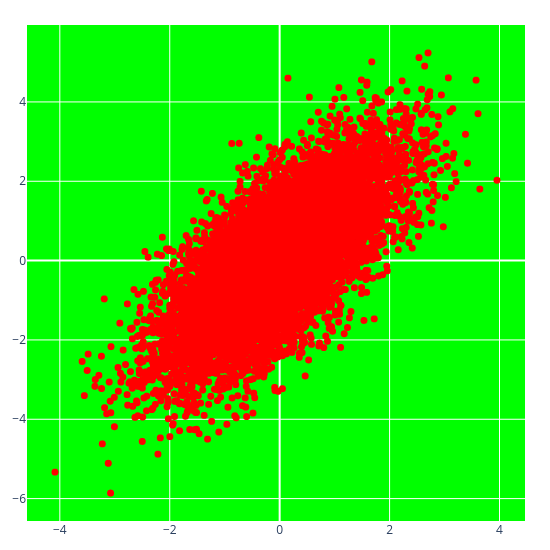

In [18]:
print("Shape Of Image Data: ", img_data.shape)
img

In [19]:
def scores_over_samples(data, sample_rates, metric):

    target_image_data = ImageDataOf(x=data[:, 0], y=data[:, 1])

    correlations, image_diffs, images = [], [], []
    for k in sample_rates:

        print("Generating Scores For Sample Size: {} of {} ...".format(k, len(data)))

        indices = np.random.permutation(len(data))[:k]
        x_sample, y_sample = data[indices, 0], data[indices, 1]
        
        R = np.corrcoef(x=x_sample, y=y_sample)
        correlations.append(R[0, 1])

        sample_image_data = ImageDataOf(x=x_sample, y=y_sample)
        image_diffs.append(metric(sample_image_data, target_image_data))

        images.append(Image.fromarray(sample_image_data))


    return np.array(correlations), np.array(image_diffs), images

In [20]:
norm_op = Normal(p=2)
reduced_sample_rates = [100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000, len(data)]
r_scores, img_scores, scatter_plot_images = scores_over_samples(data, sample_rates=reduced_sample_rates, metric=norm)

Generating Scores For Sample Size: 100 of 10000 ...
Generating Scores For Sample Size: 200 of 10000 ...
Generating Scores For Sample Size: 300 of 10000 ...
Generating Scores For Sample Size: 500 of 10000 ...
Generating Scores For Sample Size: 1000 of 10000 ...
Generating Scores For Sample Size: 2000 of 10000 ...
Generating Scores For Sample Size: 3000 of 10000 ...
Generating Scores For Sample Size: 4000 of 10000 ...
Generating Scores For Sample Size: 5000 of 10000 ...
Generating Scores For Sample Size: 10000 of 10000 ...


In [22]:
print("Correlations: \n", r_scores)
print("Distance Scores: \n", img_scores)

Correlations: 
 [0.75674832 0.71138587 0.7275876  0.71450973 0.70383581 0.6949608
 0.70466879 0.69909998 0.71869068 0.71389023]
Distance Scores: 
 [2201.81288942 2249.06625069 2442.63976059 2385.60055332 2258.39766206
 2230.98655307 2385.69612482 1764.98866852 1722.4566758    13.96424004]


In [23]:
r_line = go.Figure(lineof(x=reduced_sample_rates, y=r_scores))
distance_line = go.Figure(lineof(x=reduced_sample_rates, y=img_scores))

In [24]:
r_line

In [25]:
distance_line

Number Of Scatter Plot Images:  10


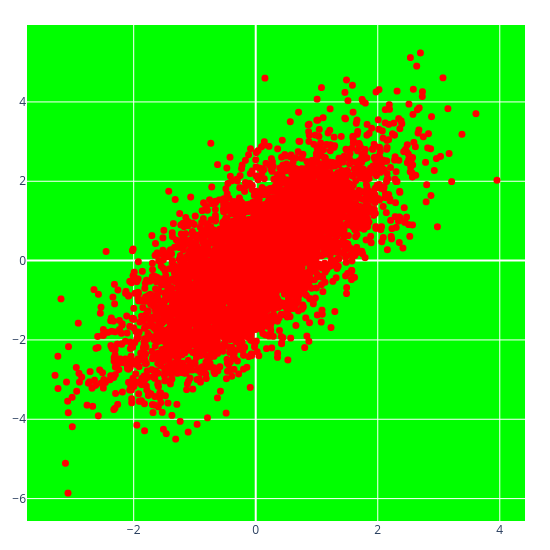

In [28]:
print("Number Of Scatter Plot Images: ", len(scatter_plot_images))
scatter_plot_image_index = 8
scatter_plot_images[scatter_plot_image_index]

#### Thoughts

How much would the score improve if you catured the outliers first for the above linear trend? This should at least get the scales right, I think.... :)

What does it mean to be an outlier? (MacroBase and other literature might have relavent insights here.) In this case, we could state that the points farthest from the center our outliers.
This kind of leads to the question of how to embed distance data into an arbitrary dataset. How do we project tabular data onto the 2D plane? Can that meta data be incorporated into an online data stream?
Instead of caputring outliers, maybe we should omit them?

For now, lets use our knowledge about this graph and cheat. We will test including the 50 most extreeme (farthest distance from the center and see how that affects the distance scores) and
exlude them and see how it effects the Euclidean distance bewteen the images. Including outliers at the expense of more representative data may create an unacceptable shift in correlation.

Even if you do include the outliers as priorities, does that help or hurt the analyst in the end? Remember, they are not really (should not be) interested in the absolute image quality. They
simply need a reliable correlation which safices for exploratory analysis.

Can we generate a distance metric on images that is correlated with the observed correlation in the graph?

##### Capture 50 Outliers

In [29]:
def select_outliers(data, k=50):
    return data[np.argsort(np.linalg.norm(data, axis=1))[-k:], :]

In [30]:
def scores_over_samples_outliers(data, sample_rates, metric):

    target_image_data = ImageDataOf(x=data[:, 0], y=data[:, 1])

    correlations, image_diffs, images = [], [], []
    outlier_indices = np.argsort(np.linalg.norm(data, axis=1))[-50:]
    outliers, inliers = np.take(data, outlier_indices, axis=0), np.delete(data, outlier_indices, axis=0)

    print(outliers.shape)
    print(inliers.shape)

    for k in sample_rates:

        print("Generating Scores For Sample Size: {} of {} ...".format(k, len(data)))

        indices = np.random.permutation(len(inliers))[:k]
        x_sample = np.concatenate((outliers[:, 0], inliers[indices, 0]))
        y_sample = np.concatenate((outliers[:, 1], inliers[indices, 1]))
        
        
        R = np.corrcoef(x=x_sample, y=y_sample)
        correlations.append(R[0, 1])

        sample_image_data = ImageDataOf(x=x_sample, y=y_sample)
        image_diffs.append(metric(sample_image_data, target_image_data))

        images.append(Image.fromarray(sample_image_data))


    return np.array(correlations), np.array(image_diffs), images

In [31]:
norm_op = Normal(p=2)
reduced_sample_rates = [100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000, len(data)]
r_scores_outliers, img_scores_outliers, scatter_plot_image_outliers = scores_over_samples_outliers(data, sample_rates=reduced_sample_rates, metric=norm)

(50, 2)
(9950, 2)
Generating Scores For Sample Size: 100 of 10000 ...
Generating Scores For Sample Size: 200 of 10000 ...
Generating Scores For Sample Size: 300 of 10000 ...
Generating Scores For Sample Size: 500 of 10000 ...
Generating Scores For Sample Size: 1000 of 10000 ...
Generating Scores For Sample Size: 2000 of 10000 ...
Generating Scores For Sample Size: 3000 of 10000 ...
Generating Scores For Sample Size: 4000 of 10000 ...
Generating Scores For Sample Size: 5000 of 10000 ...
Generating Scores For Sample Size: 10000 of 10000 ...


In [32]:
print("Correlations: \n", r_scores_outliers)
print("Distance Scores: \n", img_scores_outliers)

Correlations: 
 [0.89594062 0.87339477 0.8537528  0.81853123 0.77028776 0.73651698
 0.73613507 0.71769203 0.73040625 0.71389023]
Distance Scores: 
 [1746.24568718 1803.19272403 1836.36951619 1896.73377151 1938.03379743
 1271.25646508 1184.02744901 1087.13292655 1899.23563572   14.45683229]


In [35]:
r_line_outliers = go.Figure(lineof(x=reduced_sample_rates, y=r_scores))
distance_line_outliers = go.Figure(lineof(x=reduced_sample_rates, y=img_scores))

In [36]:
r_line_outliers

In [37]:
distance_line_outliers

Number of Scatter Plot Outlier Images:  10


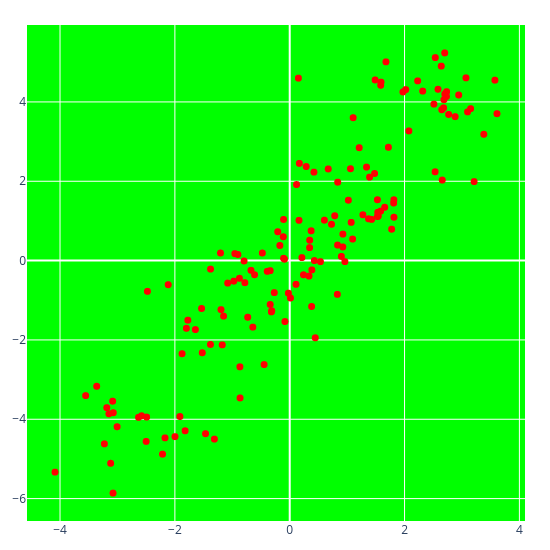

In [33]:
print("Number of Scatter Plot Outlier Images: ", len(scatter_plot_image_outliers))
selected_scatter_outlier_index = 0
scatter_plot_image_outliers[selected_scatter_outlier_index]

Lets observe the degradation in $r$ , correlation, as the variance in $y$ increases. For reference, here is the correlation formula. Remember, correlation measure the shared determinant between 2 variables. As the variance in $y$ increases, their are less predicitve factors encoded in $x$. In otherwords, based on our knowledge of $x$ are objective ignorance about $y$ increases if $y$ is more volatile around $x$. If you ground this in the case of father's height prediciting child height, this is stating that the child's height is increasing being influeced by other factors such as mother's height, enviroment, childhood diet, etc... 

In [57]:
inputs = np.random.normal(size=10000)
dep_outputs = inputs + np.random.normal(scale = 10, size=10000)
ind_outputs = np.random.normal(size=10000)

R_dep = np.corrcoef(inputs, dep_outputs)
R_ind = np.corrcoef(inputs, ind_outputs)
print("R Dependent = ", R_dep[0][1])
print("R Independent = ", R_ind[0][1])


img_test_dep, img_test_ind = ImageOf(inputs, dep_outputs), ImageOf(inputs, ind_outputs)
img_test_dep_data, img_test_ind_data = ImageDataOf(inputs, dep_outputs), ImageDataOf(inputs, ind_outputs)

print("Image Difference B/W Independent and Dependence: ", norm(img_test_dep_data, img_test_ind_data))

R Dependent =  0.1006849149413668
R Independent =  0.014409266001482193
Image Difference B/W Independent and Dependence:  2400.3837193248914


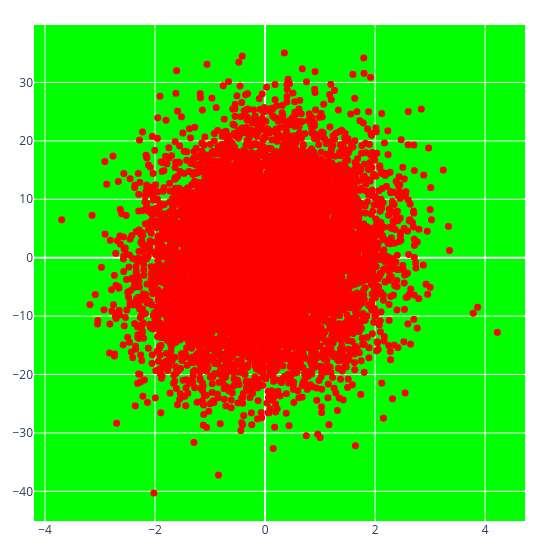

In [54]:
img_test_dep

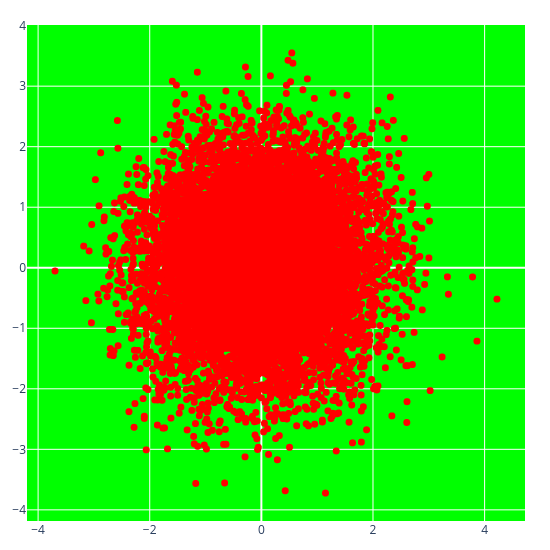

In [55]:
img_test_ind

# VAS Visaulization Aware Sampling

The goal vector of the week was to implement a visualization objective function which was correlatated with user success. Use that objective function to evaluate where optimal samples reside when sampling.

This loss function as advertised by the authors maximized the visual fidelity of the scatter plot. Existing sampling approaches focus on minimizing the error of aggregate queries to a back-end server.

Specific Tasks Under Consideration...

1) Regression
2) Density Estimation
3) Clustering


Observations...

1) Visaulization Quality loss occurs since $S$ doesn not include all of $D$.
2) The loss at $x$ is reduced as the samples include points near $x$. 
3) If $D$ has projected datapoint @ $x$, then only a few $s \in S$ need to cover it. Diminishing marginal utility afterwards.

$$
\text{point-loss}(x) = \frac{1}{\sum_{s_i \in S} \kappa(x, s_i)}
$$

$$
\kappa(x, s_i) = \exp{\frac{-\| x - s_i \|^2}{\epsilon^2}}
$$ 

$$
Loss(S) = \int \text{point-loss}(x) \, dx = \int  \frac{1}{\sum_{s_i \in S} \kappa(x, s_i)} \, dx \approx 
$$


Full dataset $D$ of $N$ tuples $D = \{t_1, t_2, ... t_N\}$ where each tuple encodes the coordinate associated at the point displayed. So how do we encode the the positional data from a random data stream into an 2D scatter plot image? This paper was an offline sampler.

So we do have the ground truth, so we will know aprior where all the datapoint are projected into the 2D plane.


SSIM

